#Project :Image Forgery Detection
##Notebook 1 
###Simple Models (Without Feature Extraction)
Mansi Patel
Megha Mathpal

In [1]:
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python

    100% |████████████████████████████████| 26.6MB 1.3MB/s 
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.


# Loading data 

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import drive
from imageio import imread
from pylab import rcParams
import pickle
# Accessing My Google Drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
def display_one(a):
    plt.imshow(a)
    plt.xticks([]), plt.yticks([])
    plt.show()
def display(a, b, title1 = "", title2 = ""):
    plt.subplot(121), plt.imshow(a,cmap='gray'), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(b,cmap='gray'), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()

In [0]:
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

In [0]:
# defining global variable path
# Location of my dataset on My Google Drive
image_path = "drive/My Drive/215/Final Project/training/"
#image_path ="drive/My Drive/Colab Notebooks/Final Project/training/"
#image_path = "https://drive.google.com/open?id=12O4zBNEjPKhCS3c8j7mftuskjsKpeQg3"
import tensorflow as tf

def loadImages(path,folder):
    '''Put files into lists and return them as one list with all images 
     in the folder'''
    image_files = sorted([os.path.join(path,folder, file)
                          for file in os.listdir(path+folder+'/')
                          if file.endswith('.png')])
    return image_files


In [0]:
fakeimage = loadImages(image_path,'fake')
pristineimage = loadImages(image_path,'pristine')

##Initial Data Shape

In [0]:
print("fake images",len(fakeimage))
print("pristine images",len(pristineimage))

fake images 900
pristine images 1050


In [0]:
fakeimage[0:10]

['dataset-dist/phase-01/training/fake\\010543abfbd0db1e9aa1b24604336e0c.mask.png',
 'dataset-dist/phase-01/training/fake\\010543abfbd0db1e9aa1b24604336e0c.png',
 'dataset-dist/phase-01/training/fake\\022354380a1a17ff49226c9eae21a11f.mask.png',
 'dataset-dist/phase-01/training/fake\\022354380a1a17ff49226c9eae21a11f.png',
 'dataset-dist/phase-01/training/fake\\0294345b3b2324b195cb3b30e91d7678.mask.png',
 'dataset-dist/phase-01/training/fake\\0294345b3b2324b195cb3b30e91d7678.png',
 'dataset-dist/phase-01/training/fake\\0363353570f16ff0a73aa0a03a7795b8.mask.png',
 'dataset-dist/phase-01/training/fake\\0363353570f16ff0a73aa0a03a7795b8.png',
 'dataset-dist/phase-01/training/fake\\0830004e471e511458600f0763ce19f3.mask.png',
 'dataset-dist/phase-01/training/fake\\0830004e471e511458600f0763ce19f3.png']

In [0]:
pristineimage[0:10]

['dataset-dist/phase-01/training/pristine\\0001d52e2fd94f30c2bca0449763a752.png',
 'dataset-dist/phase-01/training/pristine\\000bc3906100ede4b1374cea075adedb.png',
 'dataset-dist/phase-01/training/pristine\\002e23c036a05de656242f5ce6ab2e15.png',
 'dataset-dist/phase-01/training/pristine\\003f2d6e572e2587ffa809f78ff4a5c4.png',
 'dataset-dist/phase-01/training/pristine\\00d56bffe2d757a4e4625cc2d0bd0de9.png',
 'dataset-dist/phase-01/training/pristine\\00dd93f9e4af553929e54e66c2a3186e.png',
 'dataset-dist/phase-01/training/pristine\\00dffa8cb9db22527454bfa3c03b484b.png',
 'dataset-dist/phase-01/training/pristine\\00e079b66d9e9f99892bbb81d9d6cd57.png',
 'dataset-dist/phase-01/training/pristine\\00e3659be9c1fec47c739f79252840e3.png',
 'dataset-dist/phase-01/training/pristine\\00ec0ffe0cd029ad4551680484a007d7.png']

##separate the masks

In [0]:
import shutil
# segregate masks from fake images
if not os.path.isdir(image_path+'fake/masks/'):
    os.mkdir(image_path+'fake/masks/')
    for fake in fakeimage:
        if fake.endswith('.mask.png'):
            shutil.move(fake, image_path+'fake/masks/')
else:
    print('Segregated already')

##final data shape

In [0]:
fakeimage = loadImages(image_path,'fake')
pristineimage = loadImages(image_path,'pristine')
masks = loadImages(image_path,'fake/masks')

In [0]:
print("fake images",len(fakeimage))
print("pristine images",len(pristineimage))
print("masks",len(masks))

fake images 450
pristine images 1050
masks 450


# Data Preprocessing 

##fake images

In [0]:
fake_shapes=[]
for fake in fakeimage:
    if imread(fake).shape in fake_shapes:
        pass
    else:
        fake_shapes.append(imread(fake).shape)

In [0]:
fake_shapes

[(1536, 2048, 4),
 (768, 1024, 3),
 (600, 800, 4),
 (765, 1024, 3),
 (2736, 3648, 3),
 (1536, 2048, 3),
 (768, 1024, 4),
 (1200, 1800, 4),
 (4288, 3216, 3),
 (2592, 1936, 3),
 (1637, 2352, 4),
 (2112, 2816, 3),
 (1200, 1600, 3),
 (2976, 3968, 3),
 (3216, 4288, 3),
 (480, 640, 4),
 (2304, 3072, 3),
 (3000, 4000, 3),
 (1944, 2592, 3),
 (2048, 1536, 3),
 (771, 1024, 3),
 (4000, 3000, 3),
 (3240, 4320, 3),
 (2758, 4150, 4),
 (994, 1680, 4),
 (933, 1600, 4),
 (563, 798, 4),
 (570, 760, 4),
 (2748, 3664, 3),
 (1024, 768, 4),
 (1936, 2592, 3),
 (806, 1075, 3),
 (2848, 4272, 3),
 (972, 1296, 3),
 (1067, 1600, 3),
 (720, 960, 3),
 (1042, 1389, 3),
 (778, 1037, 3),
 (1920, 2560, 3),
 (3072, 2304, 3),
 (1072, 1424, 3),
 (1109, 1663, 3),
 (595, 1025, 4),
 (792, 1188, 3),
 (1286, 1709, 3),
 (648, 1152, 3),
 (1188, 792, 3),
 (1000, 1504, 3),
 (2144, 2848, 3),
 (750, 1000, 3),
 (691, 922, 3),
 (900, 1600, 3),
 (960, 1280, 3),
 (1152, 1536, 3),
 (1071, 1600, 3)]

In [0]:
print('number of distinct dimensions = {}'.format(len(fake_shapes)))
heights=[]
for each in fake_shapes:
    heights.append(each[0])
print('minimum height = {}'.format(min(heights)))
print('maximum height = {}'.format(max(heights)))
widths=[]
for each in fake_shapes:
    widths.append(each[1])
print('minimum width = {}'.format(min(widths)))
print('maximum width = {}'.format(max(widths)))
channels=[]
for each in fake_shapes:
    channels.append(each[2])
print('depth of channels = {}'.format(np.unique(np.array(channels))))

number of distinct dimensions = 55
minimum height = 480
maximum height = 4288
minimum width = 640
maximum width = 4320
depth of channels = [3 4]


In [0]:
four_channel_fakes=[]
for fake in fakeimage:
    if imread(fake).shape[2]==4:
        four_channel_fakes.append(fake)
        
three_channel_fakes = [f for f in fakeimage if f not in four_channel_fakes]

In [114]:
imread(four_channel_fakes[1]).shape

(600, 800, 4)

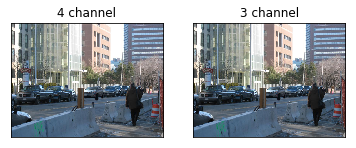

In [115]:
display(imread(four_channel_fakes[1]),imread(four_channel_fakes[1])[:,:,:3])

In [0]:
print('Fake images with 4 channels depth = {}'.format(len(four_channel_fakes)))
print('Fake images with 3 channels depth = {}'.format(len(three_channel_fakes)))

Fake images with 4 channels depth = 64
Fake images with 3 channels depth = 386


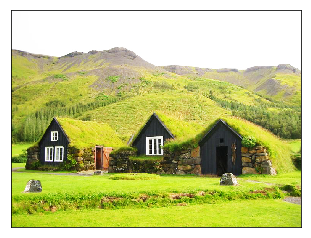

In [0]:
display_one(imread(four_channel_fakes[20]))

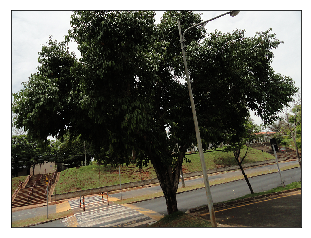

In [0]:
display_one(imread(three_channel_fakes[120]))

##masks

In [0]:
from imageio import imread
mask_shapes=[]
for mask in masks:
    if imread(mask).shape in mask_shapes:
        pass
    else:
        mask_shapes.append(imread(mask).shape)

c:\anaconda3\lib\site-packages\PIL\Image.py:969: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


In [0]:
mask_shapes

[(1536, 2048, 4),
 (768, 1024),
 (600, 800, 4),
 (765, 1024),
 (2736, 3648, 3),
 (768, 1024, 4),
 (1200, 1800, 4),
 (4288, 3216, 3),
 (2592, 1936, 3),
 (1637, 2352, 4),
 (2112, 2816, 3),
 (1200, 1600, 3),
 (2976, 3968, 3),
 (3216, 4288, 3),
 (480, 640, 4),
 (2304, 3072, 3),
 (3000, 4000, 3),
 (1944, 2592, 3),
 (2048, 1536, 4),
 (771, 1024),
 (4000, 3000, 3),
 (3240, 4320, 3),
 (2758, 4150, 4),
 (1536, 2048, 3),
 (994, 1680, 4),
 (933, 1600, 4),
 (563, 798, 4),
 (570, 760, 4),
 (2304, 3072),
 (2748, 3664, 3),
 (598, 848, 3),
 (1024, 768),
 (3240, 4320),
 (2304, 3072, 4),
 (1936, 2592, 3),
 (806, 1075),
 (1200, 1600),
 (2848, 4272, 3),
 (972, 1296),
 (1067, 1600),
 (720, 960),
 (1042, 1389),
 (778, 1037),
 (1920, 2560, 3),
 (3072, 2304, 3),
 (1072, 1424),
 (1109, 1663),
 (595, 1025),
 (792, 1188),
 (1286, 1709),
 (648, 1152),
 (1188, 792),
 (1000, 1504),
 (2144, 2848, 3),
 (750, 1000),
 (691, 922),
 (900, 1600),
 (960, 1280),
 (1152, 1536),
 (1071, 1600)]

In [0]:
print('number of distinct dimensions = {}'.format(len(mask_shapes)))
heights=[]
for each in mask_shapes:
  heights.append(each[0])
print('minimum height = {}'.format(min(heights)))
print('maximum height = {}'.format(max(heights)))
widths=[]
for each in mask_shapes:
  widths.append(each[1])
print('minimum width = {}'.format(min(widths)))
print('maximum width = {}'.format(max(widths)))
channels=[]
for each in mask_shapes:
  if(len(each)==2):
    pass
  else:
    channels.append(each[2])
CH = np.unique(np.array(channels))
print('depth of channels = {}'.format(np.append(CH,[0])))

number of distinct dimensions = 60
minimum height = 480
maximum height = 4288
minimum width = 640
maximum width = 4320
depth of channels = [3 4 0]


In [0]:
one_channel_masks=[]
for mask in masks:
    if len(imread(mask).shape)==2:
        one_channel_masks.append(mask)
three_channel_masks=[]
for mask in masks:
    img=imread(mask)
    if len(img.shape)==3 and img.shape[2]==3:
        three_channel_masks.append(mask)

four_channel_masks=[m for m in masks if ((m not in one_channel_masks) and (m not in three_channel_masks))]

In [0]:
print('Masks with 4 channels depth = {}'.format(len(four_channel_masks)))
print('Masks with 3 channels depth = {}'.format(len(three_channel_masks)))
print('Masks with 1 channels depth = {}'.format(len(one_channel_masks)))

Masks with 4 channels depth = 55
Masks with 3 channels depth = 65
Masks with 1 channels depth = 330


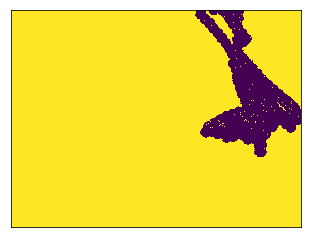

In [0]:
display_one(imread(one_channel_masks[2]))

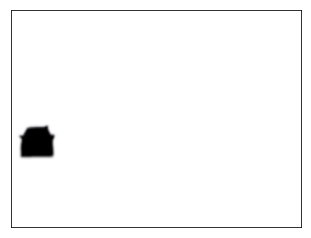

In [0]:
display_one(imread(three_channel_masks[4]))

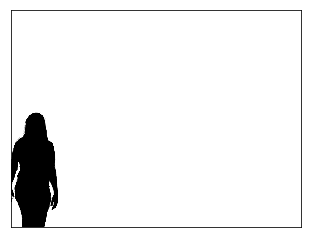

In [0]:
display_one(imread(four_channel_masks[12]))

A Jupyter Widget

(768, 1024, 3) 	(598, 848, 3)


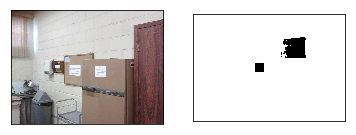

(768, 1024, 3) 	(598, 848, 3)


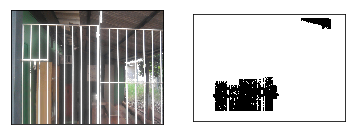

(1536, 2048, 3) 	(2304, 3072, 4)


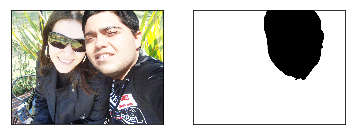

(768, 1024, 3) 	(598, 848, 3)


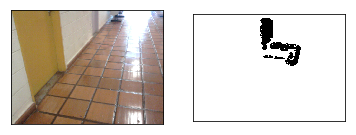

(768, 1024, 3) 	(598, 848, 3)


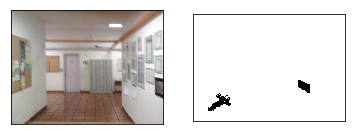

(768, 1024, 3) 	(598, 848, 3)


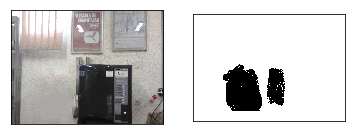

(768, 1024, 3) 	(598, 848, 3)


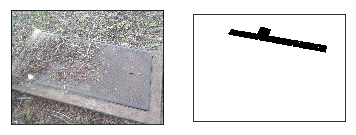

(768, 1024, 3) 	(598, 848, 3)


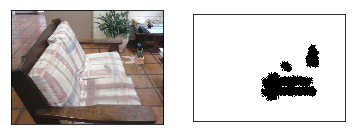

In [0]:
from tqdm import tqdm_notebook, tqdm
i=0
for mask, fake in tqdm_notebook(zip(masks, fakeimage)):
    mask_img=imread(mask)
    fake_img=imread(fake)
    if mask_img.shape[:2]!=fake_img.shape[:2]:
        i+=1
        print(str(fake_img.shape)+' \t'+str(mask_img.shape))
        display(fake_img,mask_img)

##pristine images

In [0]:
from imageio import imread
pristine_shapes=[]
for real in pristineimage:
    if imread(real).shape in pristine_shapes:
        pass
    else:
        pristine_shapes.append(imread(real).shape)

In [0]:
pristine_shapes

[(768, 1024, 3),
 (683, 1024, 3),
 (681, 1024, 3),
 (680, 1024, 3),
 (768, 1024, 4),
 (575, 1024, 3),
 (768, 1020, 3),
 (768, 576, 4),
 (681, 1024, 4),
 (768, 1024)]

In [0]:
print('number of distinct dimensions = {}'.format(len(pristine_shapes)))
heights=[]
for each in pristine_shapes:
    heights.append(each[0])
print('minimum height = {}'.format(min(heights)))
print('maximum height = {}'.format(max(heights)))
widths=[]
for each in pristine_shapes:
    widths.append(each[1])
print('minimum width = {}'.format(min(widths)))
print('maximum width = {}'.format(max(widths)))
channels=[]
for each in pristine_shapes:
    if(len(each)==2):
        pass
    else:
        channels.append(each[2])
CH = np.unique(np.array(channels))
print('depth of channels = {}'.format(np.append(CH,[0])))

number of distinct dimensions = 10
minimum height = 575
maximum height = 768
minimum width = 576
maximum width = 1024
depth of channels = [3 4 0]


In [0]:
one_channel_pristines=[]
for real in pristineimage:
    if len(imread(real).shape)==2:
        one_channel_pristines.append(real)
three_channel_pristines=[]
for real in pristineimage:
    img=imread(real)
    if len(img.shape)==3 and img.shape[2]==3:
        three_channel_pristines.append(real)

four_channel_pristines=[m for m in pristineimage if ((m not in one_channel_pristines) and (m not in three_channel_pristines))]

In [0]:
print('Pristine images with 4 channels depth = {}'.format(len(four_channel_pristines)))
print('Pristine images with 3 channels depth = {}'.format(len(three_channel_pristines)))
print('Pristine images with 1 channels depth = {}'.format(len(one_channel_pristines)))

Pristine images with 4 channels depth = 22
Pristine images with 3 channels depth = 1025
Pristine images with 1 channels depth = 3


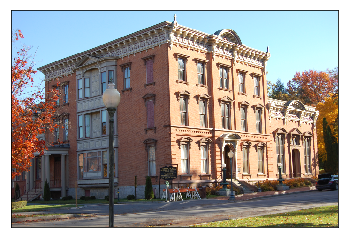

In [0]:
display_one(imread(three_channel_pristines[12]))

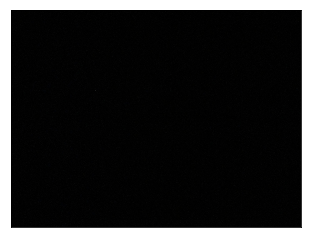

In [0]:
display_one(imread(four_channel_pristines[12]))

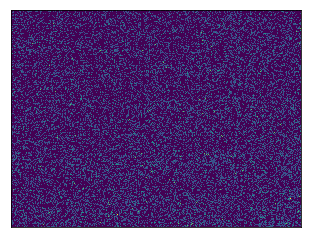

In [0]:
display_one(imread(one_channel_pristines[2]))

#Data Visualization

Fake

In [79]:
print('Fake images with 4 channels depth = {}'.format(len(four_channel_fakes)))
print('Fake images with 3 channels depth = {}'.format(len(three_channel_fakes)))

Fake images with 4 channels depth = 64
Fake images with 3 channels depth = 386


In [0]:
fake1 =len(four_channel_fakes)
fake2 =len(three_channel_fakes)

Pristine

In [82]:
print('Pristine images with 4 channels depth = {}'.format(len(four_channel_pristines)))
print('Pristine images with 3 channels depth = {}'.format(len(three_channel_pristines)))
print('Pristine images with 1 channels depth = {}'.format(len(one_channel_pristines)))

Pristine images with 4 channels depth = 22
Pristine images with 3 channels depth = 1025
Pristine images with 1 channels depth = 3


In [0]:
pristine1 =len(four_channel_pristines)
pristine2 =len(three_channel_pristines)
pristine3 = len(one_channel_pristines)

Masks

In [84]:
one_channel_masks=[]
for mask in masks:
    if len(imread(mask).shape)==2:
        one_channel_masks.append(mask)
three_channel_masks=[]
for mask in masks:
    img=imread(mask)
    if len(img.shape)==3 and img.shape[2]==3:
        three_channel_masks.append(mask)

four_channel_masks=[m for m in masks if ((m not in one_channel_masks) and (m not in three_channel_masks))]

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   

In [85]:
print('Masks with 4 channels depth = {}'.format(len(four_channel_masks)))
print('Masks with 3 channels depth = {}'.format(len(three_channel_masks)))
print('Masks with 1 channels depth = {}'.format(len(one_channel_masks)))

Masks with 4 channels depth = 55
Masks with 3 channels depth = 65
Masks with 1 channels depth = 330


In [0]:
mask1 = len(four_channel_masks)
mask2 =len(three_channel_masks)
mask3 = len(one_channel_masks)

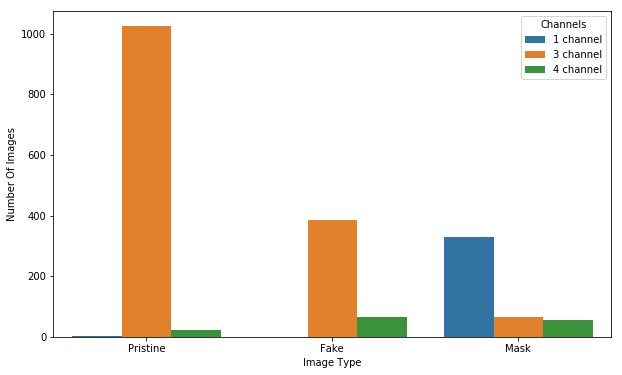

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import datetime
import seaborn as sns
x = ['Pristine',
     'Fake',
     'Mask']


y = [pristine3,0, mask3]
z=[pristine2,fake2,mask2]
k=[pristine1,fake1,mask1]
df = pd.DataFrame(zip(x*3, ["1 channel"]*3+["3 channel"]*3+["4 channel"]*3, y+z+k), columns=["Image Type", "Channels", "Number Of Images"])
plt.figure(figsize=(10, 6))
sns.barplot(x="Image Type", hue="Channels", y="Number Of Images", data=df)
plt.show()

#Data cleaning

In [0]:
#featching all pristine images with 3 channels depth only
pristines_final=[]
for pristine in pristineimage:
    img=imread(pristine)
    if len(img.shape)<3:
        continue
    if img.shape[2]==4:
        continue
    pristines_final.append(pristine)
print(len(pristines_final))

1025


In [0]:
#loading fake images converting all to 3 channels depth
fake_images=[]
fakes_final=[]
for fake in fakeimage:
    img=imread(fake)
    try:
        fake_images.append(img[:,:,:3])
        fakes_final.append(fake)
    except IndexError:
        print(f'image {fake} has only 1 channel')
print(len(fakes_final))

450


#Train- Test Preparation

In [0]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
df_fake = pd.DataFrame(fakes_final,columns=['image_path'])
df_real = pd.DataFrame(pristines_final,columns=['image_path'])
df_fake['image_type']= 'fake'
df_real['image_type']= 'pristine'

In [0]:
df_fake = df_fake.reindex(np.random.permutation(df_fake.index))
df_fake.reset_index(inplace=True, drop=True)
df_real = df_real.reindex(np.random.permutation(df_real.index))
df_real.reset_index(inplace=True, drop=True)

In [0]:
df_final = pd.concat([df_fake.head(450),df_real.head(450)],ignore_index=True)

In [0]:
df_final[0:10]

,image_path,image_type
0,drive/My Drive/215/Final Project/training/fake/93644a457afc64b27a692c1ecd9df773.png,fake
1,drive/My Drive/215/Final Project/training/fake/d114ce94a3994d16e43a4de93fe72e17.png,fake
2,drive/My Drive/215/Final Project/training/fake/aa62ae56c20735351461f141d4ede330.png,fake
3,drive/My Drive/215/Final Project/training/fake/997003561434af248f5b8cc8fb697c70.png,fake
4,drive/My Drive/215/Final Project/training/fake/91c79965316355431c3c8fed22a115ae.png,fake
5,drive/My Drive/215/Final Project/training/fake/8812398ed09ccb906f4e0d608aec0913.png,fake
6,drive/My Drive/215/Final Project/training/fake/a2e715a637a43b33199c0991785adab7.png,fake
7,drive/My Drive/215/Final Project/training/fake/95545cc4da4cae23ec42672bbbd3bfa7.png,fake
8,drive/My Drive/215/Final Project/training/fake/30096e4b0cdadb88b548f4fa2aee4b95.png,fake
9,drive/My Drive/215/Final Project/training/fake/d2d7c3bf0395220f58bdc48df5a9c8d6.png,fake


In [0]:
df_final = df_final.reindex(np.random.permutation(df_final.index))
df_final.reset_index(inplace=True, drop=True)
df_final

,image_path,image_type
0,drive/My Drive/215/Final Project/training/fake/b97db18acbee83be9760fb8eb8661652.png,fake
1,drive/My Drive/215/Final Project/training/fake/a3978283d13463af3d6d98c6ae6d6be7.png,fake
2,drive/My Drive/215/Final Project/training/pristine/1d23dbb0c4fccc0a7cf1d0a64ebb538f.png,pristine
3,drive/My Drive/215/Final Project/training/pristine/2cb78dccf9ba294a0876030ecbc4d807.png,pristine
4,drive/My Drive/215/Final Project/training/pristine/1ff3b1001a36c15f237a5d619aad1579.png,pristine
5,drive/My Drive/215/Final Project/training/fake/bb6bc81243a3d15132b3a2b42e1e5f0e.png,fake
6,drive/My Drive/215/Final Project/training/pristine/4ae0c894f801b4b9434d1f7a8b1847b8.png,pristine
7,drive/My Drive/215/Final Project/training/pristine/2de34c80144f4a4e1846777bc4b8601f.png,pristine
8,drive/My Drive/215/Final Project/training/pristine/0d913c2e19eee6f08c0845beaec4d7c3.png,pristine
9,drive/My Drive/215/Final Project/training/fake/d76330914587add652997eda2c3caa98.png,fake


In [0]:
from sklearn.model_selection import train_test_split
image_names = df_final['image_path']
labels = df_final['image_type']
x_train, x_test, y_train, y_test = train_test_split(image_names, labels, test_size=0.3, stratify=labels)

In [0]:
print("x train",len(x_train),"x test",len(x_test))
print("y train",len(y_train),"y test",len(y_test))

x train 630 x test 270
y train 630 y test 270


In [0]:
df_data = pd.DataFrame([x_train,y_train])

In [0]:
df_train = df_data.T
#df_train[0:10]

In [0]:
from sklearn.model_selection import train_test_split
image_names = df_train['image_path']
labels = df_train['image_type']
x_train, x_cv, y_train, y_cv = train_test_split(image_names, labels, test_size=0.3, stratify=labels)

In [0]:
#Saving th train test partitions on the drive to use it again
np.save(image_path+'x_test.npy',x_test)
np.save(image_path+'y_test.npy',y_test)
np.save(image_path+'x_train.npy',x_train)
np.save(image_path+'x_cv.npy',x_cv)
np.save(image_path+'y_train.npy',y_train)
np.save(image_path+'y_cv.npy',y_cv)

In [0]:
import pandas as pd
import numpy as np
x_test = np.load(image_path+'x_test.npy',allow_pickle=True)
y_test = np.load(image_path+'y_test.npy',allow_pickle=True)
x_cv = np.load(image_path+'x_cv.npy',allow_pickle=True)
y_cv = np.load(image_path+'y_cv.npy',allow_pickle=True)
x_train = np.load(image_path+'x_train.npy',allow_pickle=True)
y_train = np.load(image_path+'y_train.npy',allow_pickle=True)

In [0]:
train_data = pd.DataFrame([x_train,y_train]).T

In [0]:
train_data.columns=['image_path','image_type']

In [91]:
train_data[0:10]

,image_path,image_type
0,drive/My Drive/215/Final Project/training/pris...,pristine
1,drive/My Drive/215/Final Project/training/pris...,pristine
2,drive/My Drive/215/Final Project/training/fake...,fake
3,drive/My Drive/215/Final Project/training/fake...,fake
4,drive/My Drive/215/Final Project/training/pris...,pristine
5,drive/My Drive/215/Final Project/training/fake...,fake
6,drive/My Drive/215/Final Project/training/fake...,fake
7,drive/My Drive/215/Final Project/training/fake...,fake
8,drive/My Drive/215/Final Project/training/fake...,fake
9,drive/My Drive/215/Final Project/training/pris...,pristine


In [0]:
valid_data = pd.DataFrame([x_cv,y_cv]).T

In [0]:
valid_data.columns=['image_path','image_type']

In [90]:
valid_data[0:10]

,image_path,image_type
0,drive/My Drive/215/Final Project/training/fake...,fake
1,drive/My Drive/215/Final Project/training/pris...,pristine
2,drive/My Drive/215/Final Project/training/fake...,fake
3,drive/My Drive/215/Final Project/training/pris...,pristine
4,drive/My Drive/215/Final Project/training/fake...,fake
5,drive/My Drive/215/Final Project/training/fake...,fake
6,drive/My Drive/215/Final Project/training/fake...,fake
7,drive/My Drive/215/Final Project/training/fake...,fake
8,drive/My Drive/215/Final Project/training/fake...,fake
9,drive/My Drive/215/Final Project/training/fake...,fake


In [0]:
test_data = pd.DataFrame([x_test])

In [0]:
test_data1 = pd.DataFrame([x_test,y_test])
test_data2 = test_data1.T
test_data2.columns=['image_path','image_type']

In [89]:
test_data2[0:10]

,image_path,image_type
0,drive/My Drive/215/Final Project/training/fake...,fake
1,drive/My Drive/215/Final Project/training/pris...,pristine
2,drive/My Drive/215/Final Project/training/pris...,pristine
3,drive/My Drive/215/Final Project/training/fake...,fake
4,drive/My Drive/215/Final Project/training/fake...,fake
5,drive/My Drive/215/Final Project/training/fake...,fake
6,drive/My Drive/215/Final Project/training/fake...,fake
7,drive/My Drive/215/Final Project/training/pris...,pristine
8,drive/My Drive/215/Final Project/training/pris...,pristine
9,drive/My Drive/215/Final Project/training/pris...,pristine


In [0]:
x_test = test_data.T

In [0]:
x_test.columns=['image_path']

#CNN

In [0]:
    from keras.models import Sequential 
    from keras.layers import Dense, Activation, Dropout, BatchNormalization, Conv2D, MaxPool2D, Flatten
    from keras import optimizers
    import sys
    import os
    cnn_model=Sequential()

    cnn_model.add(Conv2D(input_shape=(64, 64, 3), filters=20, kernel_size=4, strides=2, padding='valid',
                         activation='relu',  data_format='channels_last'))

    cnn_model.add(Conv2D(filters=15, kernel_size=3, strides=1, padding='valid', activation='relu',
                          data_format='channels_last'))

    cnn_model.add(MaxPool2D(pool_size=3, data_format='channels_last'))

    cnn_model.add(Conv2D(filters=20, kernel_size=4, strides=2, padding='valid', activation='relu',
                          data_format='channels_last'))

    cnn_model.add(MaxPool2D(pool_size=2, data_format='channels_last'))

    # cnn_model.add(Conv2D(filters=15, kernel_size=2, strides=1, padding='valid', activation='relu',
    #                       data_format='channels_last'))

    # cnn_model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='valid', activation='relu',
    #                       data_format='channels_last'))

    # cnn_model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='valid', activation='relu',
    #                      kernel_initializer='he_normal', data_format='channels_last'))

    cnn_model.add(Flatten())

    cnn_model.add(Dropout(0.2))

    cnn_model.add(Dense(1, activation='sigmoid'))

    cnn_model.compile(optimizer=optimizers.Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
    cnn_model.summary()

Instructions for updating:
Colocations handled automatically by placer.


Using TensorFlow backend.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 31, 31, 20)        980       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 15)        2715      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 15)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 20)          4820      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 20)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 20)                0         
___________________________

In [0]:
from keras.preprocessing.image import ImageDataGenerator 
train_datagen = ImageDataGenerator(rescale=1./255)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
        # This is the target directory
        train_data,
        x_col='image_path', 
        y_col='image_type',
        color_mode='rgb',
        # All images will be resized to 64x64        
        target_size=(64, 64),
        batch_size=16,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_dataframe(
        valid_data,
        x_col='image_path', 
        y_col='image_type',
        color_mode='rgb',
        target_size=(64, 64),
        batch_size=16,
        class_mode='binary')


history = cnn_model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=200,
      verbose=1,
      validation_data=validation_generator,
      validation_steps=50)

cnn_model.save(image_path+'keras_cnn_model_only_images.hdf5')

Found 441 images belonging to 2 classes.
Found 189 images belonging to 2 classes.
Instructions for updating:
Use tf.cast instead.
Epoch 1/200
100/100 [==============================] - 394s 4s/step - loss: 0.6900 - acc: 0.5317 - val_loss: 0.6897 - val_acc: 0.5558
Epoch 2/200
100/100 [==============================] - 102s 1s/step - loss: 0.6910 - acc: 0.5405 - val_loss: 0.6880 - val_acc: 0.5787
Epoch 3/200
100/100 [==============================] - 103s 1s/step - loss: 0.6852 - acc: 0.5603 - val_loss: 0.6874 - val_acc: 0.5711
Epoch 4/200
100/100 [==============================] - 100s 1s/step - loss: 0.6830 - acc: 0.5779 - val_loss: 0.6882 - val_acc: 0.5609
Epoch 5/200
100/100 [==============================] - 103s 1s/step - loss: 0.6818 - acc: 0.5708 - val_loss: 0.6844 - val_acc: 0.6015
Epoch 6/200
100/100 [==============================] - 101s 1s/step - loss: 0.6788 - acc: 0.5838 - val_loss: 0.6853 - val_acc: 0.5682
Epoch 7/200
100/100 [==============================] - 100s 1s/ste

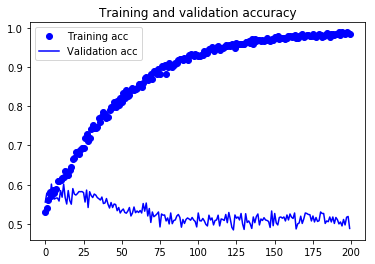

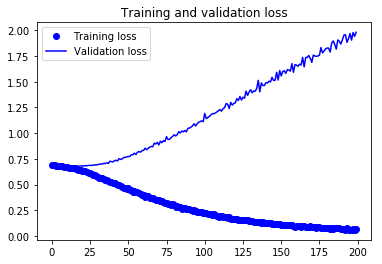

In [0]:
import matplotlib.pyplot as plt
from keras.models import load_model

#history=load_model(image_path+'keras_cnn_model.hdf5')
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [92]:
from keras.models import load_model
cnn_model = load_model(image_path+'keras_cnn_model_only_images.hdf5')

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [0]:
import cv2
#from google.colab.patches import cv2_imshow
x_t = []
for x in x_cv:
    img = imread(x)
    img = img[:,:,:3]
    #print('Original Dimensions : ',img.shape)
    #scale_percent = 60 # percent of original size
    width = 64
    height =64
    dim = (width, height)
    # resize image
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    #resized = resized.reshape((1,) + resized.shape) 
    #resized.tolist()
    x_t.append(resized)
#print('Resized Dimensions : ',resized.shape)
x_t = np.array(x_t)

In [0]:
x_t = x_t/255

In [95]:
x_t.shape

(189, 64, 64, 3)

In [55]:
train_generator.class_indices

{'fake': 0, 'pristine': 1}

In [0]:
for y in range(len(y_cv)):
  if(y_cv[y]=='fake'):
    y_cv[y] = 0
  else:
    y_cv[y] = 1

In [0]:
y_cv = [[x] for x in y_cv]

In [96]:
y_cv

[[0],
 [1],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [1],
 [1],
 [0],
 [1],
 [0],
 [1],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [1],
 [0],
 [0],
 [1],
 [0],
 [1],
 [1],
 [1],
 [0],
 [0],
 [0],
 [0],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [0],
 [0],
 [1],
 [1],
 [1],
 [1],
 [0],
 [1],
 [0],
 [1],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [1],
 [1],
 [0],
 [0],
 [1],
 [1],
 [0],
 [1],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [1],
 [1],
 [1],
 [0],
 [1],
 [0],
 [1],
 [1],
 [0],
 [1],
 [1],
 [0],
 [0],
 [1],
 [0],
 [1],
 [1],
 [1],
 [0],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [0],
 [0],
 [1],
 [1],
 [1],
 [0],
 [0],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [1],
 [0],
 [0],
 [1],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [0],
 [0],
 [1],
 [1],
 [1],
 [0]

##Evaluation

Precision score: 0.5396451620941417
Recall score: 0.5396825396825397
F1 score: 0.5395278327920814
[[53 42]
 [45 49]]
Plot of Confusion Matrix


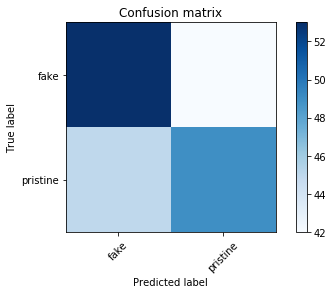

              precision    recall  f1-score   support

           0       0.54      0.56      0.55        95
           1       0.54      0.52      0.53        94

   micro avg       0.54      0.54      0.54       189
   macro avg       0.54      0.54      0.54       189
weighted avg       0.54      0.54      0.54       189



In [97]:
y_pred_cnn = cnn_model.predict_classes(x_t)
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import svm, datasets
score = metrics.precision_score(y_cv,y_pred_cnn, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_cv, y_pred_cnn, average= "weighted")
print("Recall score: {}".format(score))
score_lr1 = metrics.f1_score(y_cv, y_pred_cnn, average= "weighted")
print("F1 score: {}".format(score_lr1))
#score = metrics.log_loss(y_true, pred2) #this was not working was showing y_true & y_pred both contain different classes 3 , 2.
#print("Log loss score: {}".format(score))
cm = confusion_matrix(y_cv,y_pred_cnn)
print(cm)
print('Plot of Confusion Matrix')
plt.figure()
plot_confusion_matrix(cm,['fake','pristine'])
plt.show()
print(classification_report(y_cv,y_pred_cnn))

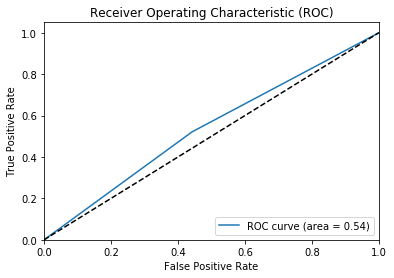

In [0]:
plot_roc(y_pred_cnn,y_cv)

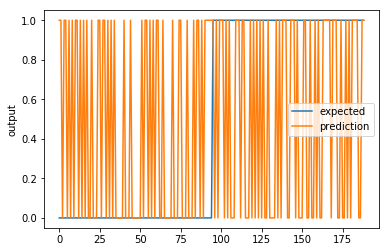

In [98]:
y_pred1 = [x for [x] in y_pred_cnn]
chart_regression(y_pred1,np.array(y_cv))

#Transfer Learning

In [0]:
import numpy as np
from keras import applications
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras import optimizers
from keras.applications.vgg16 import VGG16
vgg_model=VGG16(weights='imagenet', include_top=False, input_shape=(64,64,3))
model_aug=Sequential()
model_aug.add(vgg_model)
top_model=Sequential()
top_model.add(Flatten(input_shape=(2, 2, 512)))
#model_aug.add(Dropout(0.3))
top_model.add(Dense(64, activation='relu'))
top_model.add(Dense(1, activation='sigmoid'))
model_aug.add(top_model)

for layer in model_aug.layers[0].layers[:17]:
  layer.trainable=False
model_aug.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(lr=1e-6), metrics=['accuracy'])
print(model_aug.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 2, 2, 512)         14714688  
_________________________________________________________________
sequential_4 (Sequential)    (None, 1)                 131201    
Total params: 14,845,889
Trainable params: 2,491,009
Non-trainable params: 12,354,880
_________________________________________________________________
None


In [0]:
from keras.preprocessing.image import ImageDataGenerator 
train_datagen = ImageDataGenerator(
    rescale=1./255)
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')
from keras.models import load_model, Sequential
from keras.callbacks import EarlyStopping
import numpy as np
# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
        # This is the target directory
        train_data,
        x_col='image_path', 
        y_col='image_type',
        color_mode='rgb',
        shuffle=True,
        # All images will be resized to 150x150
        target_size=(64, 64),
        batch_size=16,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_dataframe(
        valid_data,
        x_col='image_path', 
        y_col='image_type',
        color_mode='rgb',
        shuffle=True,
        target_size=(64, 64),
        batch_size=16,
        class_mode='binary')


history = model_aug.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      verbose=1,
      callbacks = [monitor]
      validation_data=validation_generator,
      validation_steps=1)

model_aug.save_weights(image_path+'fine_tuned_model_top.hdf5')
with open(image_path+'model_architecture.json', 'w') as f:
    f.write(model_aug.to_json())
# Save the model architecture
#model_aug.save_weights('fine_tuned_model_top.hdf5')

Found 441 images belonging to 2 classes.
Found 189 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 87s 870ms/step - loss: 0.9164 - acc: 0.5019 - val_loss: 0.8568 - val_acc: 0.5000
Epoch 2/100
100/100 [==============================] - 81s 814ms/step - loss: 0.8064 - acc: 0.5023 - val_loss: 1.0553 - val_acc: 0.2500
Epoch 3/100
100/100 [==============================] - 84s 837ms/step - loss: 0.7444 - acc: 0.5029 - val_loss: 0.6595 - val_acc: 0.5625
Epoch 4/100
100/100 [==============================] - 82s 823ms/step - loss: 0.7039 - acc: 0.5343 - val_loss: 0.6985 - val_acc: 0.6250
Epoch 5/100
100/100 [==============================] - 81s 808ms/step - loss: 0.6819 - acc: 0.5708 - val_loss: 0.7346 - val_acc: 0.3750
Epoch 6/100
100/100 [==============================] - 82s 823ms/step - loss: 0.6667 - acc: 0.6126 - val_loss: 0.7900 - val_acc: 0.3125
Epoch 7/100
100/100 [==============================] - 84s 839ms/step - loss: 0.6528 - acc: 0.6343 - v

In [7]:
from keras.models import model_from_json
json_file = open(image_path+'model_architecture.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(image_path+"fine_tuned_model_top.hdf5")

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
import cv2
#from google.colab.patches import cv2_imshow
x_t = []
for x in x_cv:
    img = imread(x)
    img = img[:,:,:3]
    #print('Original Dimensions : ',img.shape)
    #scale_percent = 60 # percent of original size
    width = 64
    height =64
    dim = (width, height)
    # resize image
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    #resized = resized.reshape((1,) + resized.shape) 
    #resized.tolist()
    x_t.append(resized)
#print('Resized Dimensions : ',resized.shape)
x_t = np.array(x_t)

In [0]:
x_t = x_t/255

In [24]:
x_t.shape

(189, 64, 64, 3)

In [0]:
for y in range(len(y_cv)):
  if(y_cv[y]=='fake'):
    y_cv[y] = 0
  else:
    y_cv[y] = 1

In [26]:
y_cv

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0], dtype=object)

In [0]:
pred_transfer = loaded_model.predict(x_t, batch_size=None, verbose=0, steps=None)

In [0]:
y_cv = [[x] for x in y_cv]

In [34]:
len(pred_transfer)

189

In [0]:
for y in range(len(pred_transfer)):
  if(pred_transfer[y]<0.5):
    pred_transfer[y] = 0
  else:
    pred_transfer[y] = 1

##Evaluation

In [38]:
from sklearn import metrics
pred_transfer
score_lr2 = metrics.f1_score(y_cv, pred_transfer, average= "weighted")
print("F1 score: {}".format(score_lr2))

F1 score: 0.5692329345531316


Precision score: 0.5724900385394212
Recall score: 0.5714285714285714
F1 score: 0.5692329345531316
[[61 34]
 [47 47]]
Plot of Confusion Matrix


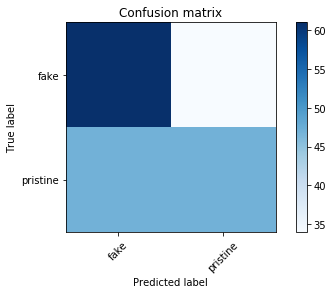

              precision    recall  f1-score   support

           0       0.56      0.64      0.60        95
           1       0.58      0.50      0.54        94

   micro avg       0.57      0.57      0.57       189
   macro avg       0.57      0.57      0.57       189
weighted avg       0.57      0.57      0.57       189



In [36]:
y_pred = loaded_model.predict_classes(x_t)
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import svm, datasets
score = metrics.precision_score(y_cv,y_pred, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_cv, y_pred, average= "weighted")
print("Recall score: {}".format(score))
score_lr2 = metrics.f1_score(y_cv, y_pred, average= "weighted")
print("F1 score: {}".format(score_lr2))
#score = metrics.log_loss(y_true, pred2) #this was not working was showing y_true & y_pred both contain different classes 3 , 2.
#print("Log loss score: {}".format(score))
cm = confusion_matrix(y_cv,y_pred)
print(cm)
print('Plot of Confusion Matrix')
plt.figure()
plot_confusion_matrix(cm,['fake','pristine'])
plt.show()
print(classification_report(y_cv,y_pred))

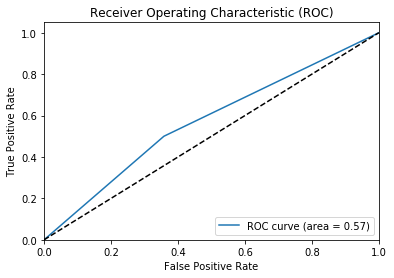

In [40]:
plot_roc(y_pred,y_cv)

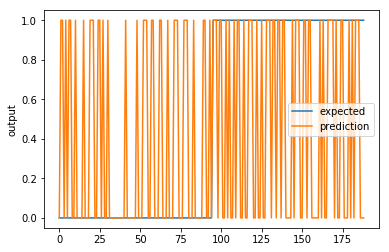

In [63]:
y_pred1 = [x for [x] in y_pred]
chart_regression(y_pred1,np.array(y_cv))

#Comparison

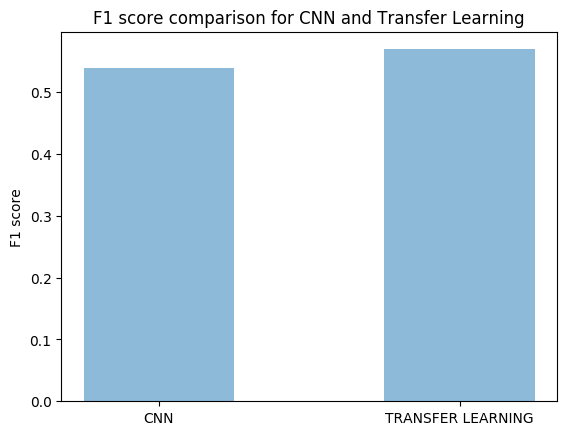

In [123]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('CNN', 'TRANSFER LEARNING')
y_pos = np.arange(len(objects))
performance = [0.5395,0.5692]
 
plt.bar(y_pos, performance, align='center', alpha=0.5,width=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('F1 score')
plt.title('F1 score comparison for CNN and Transfer Learning')
 
plt.show()

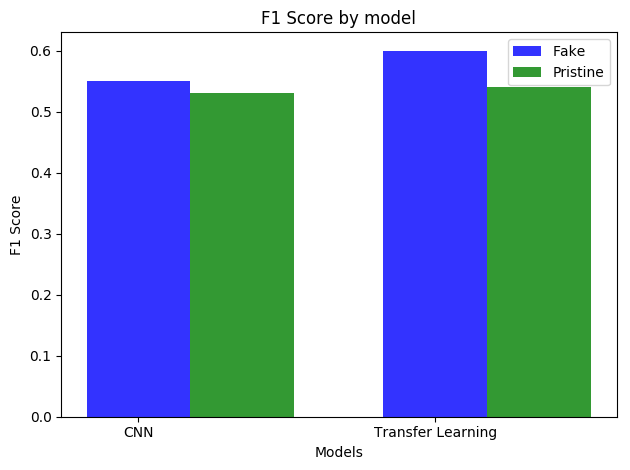

In [122]:
import numpy as np
import matplotlib.pyplot as plt
 
# data to plot
n_groups = 2
f = (0.55,0.60 )
p = (0.53, 0.54)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, f, bar_width,
alpha=opacity,
color='b',
label='Fake')
 
rects2 = plt.bar(index + bar_width, p, bar_width,
alpha=opacity,
color='g',
label='Pristine')
 
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Score by model')
plt.xticks(index , ('CNN', 'Transfer Learning'))
plt.legend()
 
plt.tight_layout()
plt.show()

#Test 5 images

In [0]:
img1 = (imread(x_cv[24]))
img2 = (imread(x_cv[25]))
img3 = (imread(x_cv[26]))
img4 = (imread(x_cv[27]))
img5 = (imread(x_cv[28]))
test5 = [img1,img2,img3,img4,img5]

In [0]:
x_t =[]

In [0]:
  for x in test5:
    img = x[:,:,:3]
    #print('Original Dimensions : ',img.shape)
    #scale_percent = 60 # percent of original size
    width = 64
    height =64
    dim = (width, height)
    # resize image
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    #resized = resized.reshape((1,) + resized.shape) 
    #resized.tolist()
    x_t.append(resized)
    #print('Resized Dimensions : ',resized.shape)


In [0]:
x_t = np.array(x_t)

In [0]:
test5 = loaded_model.predict_classes(x_t)

In [69]:
test5   #0, 1, 1, 1, 1

array([[0],
       [0],
       [1],
       [1],
       [0]], dtype=int32)

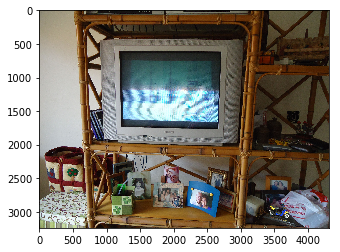

In [70]:
plt.imshow(img1)

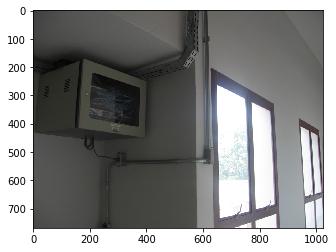

In [71]:
plt.imshow(img2)

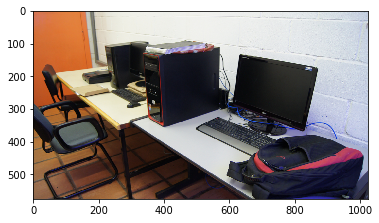

In [72]:
plt.imshow(img3)

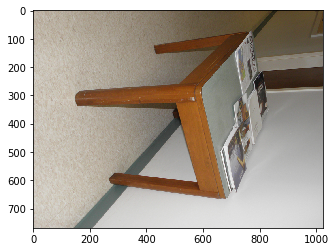

In [73]:
plt.imshow(img4)

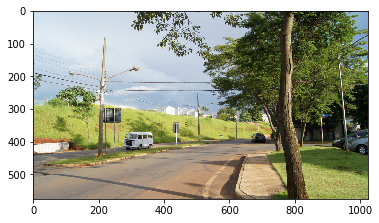

In [74]:
plt.imshow(img5)